# Signed Alphabet Detection
![Sign Language](https://www.aneking.com/wp-content/uploads/2015/04/Spanish_sign_language_alphabet.png)

__Problem Statement__

A Sign Language School is introducting a Sign to text software for their new students. The [data](https://www.kaggle.com/datasets/datamunge/sign-language-mnist) provided by the school, contains images of the signed letters. These imaes are pixelated and stored in a dataframe. 

__Objective__

The goal of this modelling task is to develop a deep neural network model that predicts the letter signed by the student. In achieving this, students will be able to perfect the signing techniques and also be able to study without the aid of a tutor and from anywhere. 

# Importing the relevant libraries

In [1]:
# Helper libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for creating a dictionary of letters and key
import string

# importing tensorFlow and its functions
import tensorflow as tf
from tensorflow.keras import layers

# Reading and Inspecting the data


### Reading the csv file
Two files were provided for developing the model, a __train dataset and a test dataset__. The files containing the data is a comma seperated file. Pandas library function will be used to import the csv files.

In [2]:
# importing the datasets using pandas' .read_csv
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
print("Train dataset: ")
display(train.head())
print("="*254)
print("Test dataset:")
display(test.head())

Train dataset: 


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Test dataset:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


## Exploring the train data

In [4]:
# printing the shape of the data
train.shape

(27455, 785)


The data contain 784 column of the pixels and a label column and 27455 rows. Each row represent the degree of hue on every pixel of the image.  The label column contains 24 classes of letters (excluding J and Z which require motion) numbering from 0 - 25 with no cases for __0 - J__ and __35 - Z__.

In [5]:
# printing the information of the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
# retrieving the statistics about the data
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


The train dataset has __27,455__ rows and and __785__, including the __Label__ column. Each row represent the degree of hue on every pixel of the image.  The label column contains 24 classes of letters (excluding J and Z which require motion) numbering from 0 - 25 with no cases for __0 - J__ and __35 - Z__. 

The other 784 columns represents the number of pixels (28 * 28). To be able to get a sense of how the data looks like, every row has be to reshaped from a single array to a __28__ by __28__ array. 

In [7]:
# checking for duplicated rows
train.duplicated().sum()

0

There are no duplicated rows in the data

_______________________________________________________________________________________________________________________

## Feature Engineering and Visualization

To be able to train deep neural networks,each row has to be reshaped from a 1 by 784 to a 28 by 28 arra. Also the values of each row ranges from 0 to 255 hence, they can be standardized ( for also fast computaion).

In [8]:
# creating a dictionary of the values and their labels
dict_key = {i:k for i,k in enumerate(string.ascii_uppercase)}
print("dict_key",dict_key)

dict_key {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


Plot of count of each class:


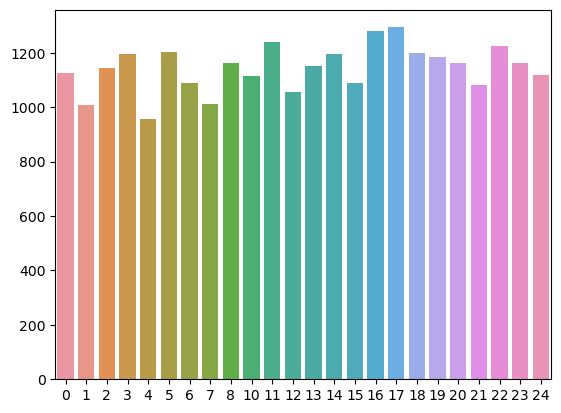

In [9]:
# finding the different classes of sentiments of the data
sent_count = train['label'].value_counts()
print('Plot of count of each class:')

# plotting the sentiments of the data
sns.barplot(x=sent_count.index, y=sent_count.values)
plt.show()

### Getting the attributes and target variables

Since there is already a test set there is no need to split the data into train and test sets. Only the predictors and target variables are required. To do this we just assign __X__ to the predictor attributes and __y__ to the target variable.

In [10]:
# Splitting the features into predictors and predictor
X = train.drop('label', axis = 1)
y = train['label']

In [11]:
# # Reshaping each row of the train data into a 28 by 28 array with a dimension of 1
X = X.values.reshape(-1,28,28)

In [12]:
# printing the shape of the predictor set
X.shape

(27455, 28, 28)

The description of the data shows that the maximum value for each column is __255__ and the minimum is __0__. To have the range of values between __0__ and __1__, the values could be simply divided by __255__.

In [13]:
# Scaling the data using the MinMax Scaler
X = X/255.0

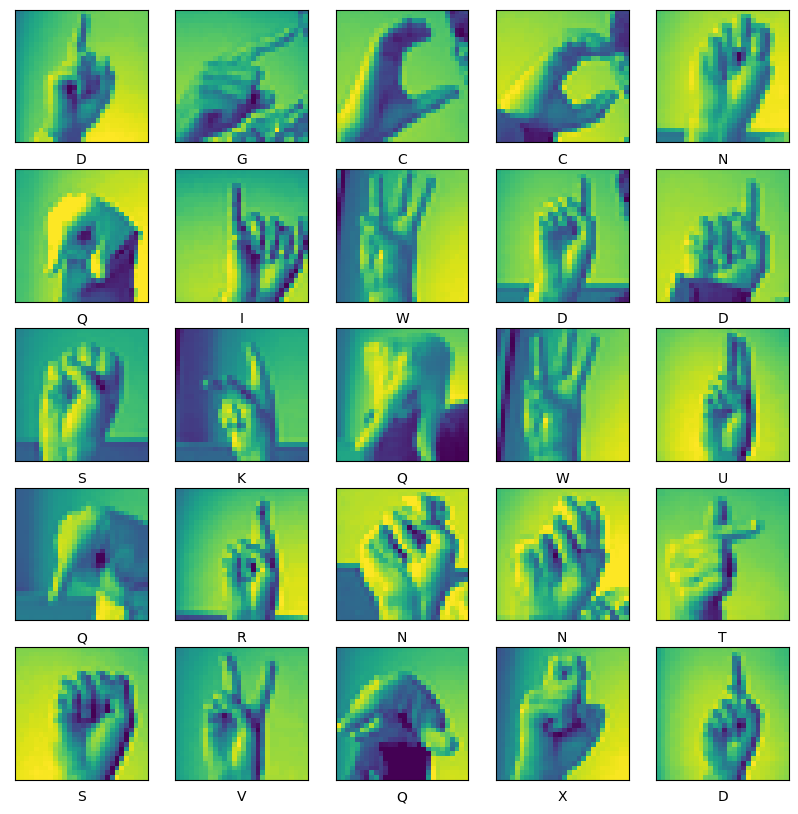

In [14]:
# plotting 25 elements in the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(dict_key[y[i]],)
plt.show()

#### Data Balancing was not performed because the upsampled data when trained resulted in a longer training time and no significant change in model accuracy

____________________________________________________________________________________________________________________

# Building Neural Networks



In training Neural Networks, different architectures were considered and trained and their respective parameters: __number of layers, activation functions used, number of batch normalization layers,__ and __optimizer__ were recorded together with their evaluation scores: __accuracy and loss__. The Sparse Categorical Crossentropy was the only function considered as the loss function since the problem is a multiclass classification problem and the target variable was not one hot encoded (which in that case Categorical Crossentropy would have been used). 

The models layers were varied based on the positions of certain layers. For instance, the Batch Normalization layers were placed at different position in the neural network and the accuracies were measured and in majority of the cases the was no change in the value.

## Deep Neural Network

In [15]:
# creating a deep neural network
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),     # adding the input layer
    layers.Dense(128, activation='relu'),        # adding a hidden layer
    layers.BatchNormalization(),                 # adding the Batch normalization layer
    layers.Dense(100),                           # adding a hidden layer
    layers.Dense(128, activation='relu'),        # adding a hidden layer
    layers.Dense(128, activation='relu'),        # adding a hidden layer
    layers.BatchNormalization(),                 # adding the Batch normalization layer
    layers.Dense(128, activation='relu'),        # adding a hidden layer
    layers.Dense(26, activation = 'softmax')    # adding a ouput layer
])

# compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# training the model
model.fit(X, y, epochs=30, batch_size = 80, validation_split = 0.3)

Epoch 1/30
241/241 [==============================] - 2s 4ms/step - loss: 1.7641 - accuracy: 0.5305 - val_loss: 1.8489 - val_accuracy: 0.5612
Epoch 2/30
241/241 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.9253 - val_loss: 0.6070 - val_accuracy: 0.8274
Epoch 3/30
241/241 [==============================] - 1s 3ms/step - loss: 0.1150 - accuracy: 0.9884 - val_loss: 0.4048 - val_accuracy: 0.8616
Epoch 4/30
241/241 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9988 - val_loss: 0.3804 - val_accuracy: 0.8826
Epoch 5/30
241/241 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9986 - val_loss: 0.0782 - val_accuracy: 0.9820
Epoch 6/30
241/241 [==============================] - 1s 3ms/step - loss: 0.0173 - accuracy: 0.9990 - val_loss: 0.0537 - val_accuracy: 0.9873
Epoch 7/30
241/241 [==============================] - 1s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 0.9977
Epoch 

## Convolutional Neural Network Model

In [16]:
# creating the CNN model
model1 = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),     # adding the input layer
    layers.BatchNormalization(),         # adding the Batch normalization layer to normalize the data
    layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu"),      # adding a convulotional layer with 32 filters
    layers.MaxPool2D(2,2),               # adding a max pool layer to down sample the features
    layers.Dropout(.25),                 # adding a drop out layer to apply regularization and prevent overfitting
    layers.BatchNormalization(),         # adding the Batch normalization layer
    layers.Dropout(.25),                 # adding a drop out layer to apply regularization and prevent overfitting
    layers.Flatten(),                    # adding a layer to flatten the data
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),          # adding a convulotional layer with 32 filters
    layers.MaxPool2D(2,2),               # adding a max pool layer
    layers.Dropout(.25),                 # adding a drop out layer to apply regularization and prevent overfitting
    layers.Dense(units=64, activation="relu"),        # adding a hidden layer
    layers.Dense(units=26, activation="softmax"),     # adding the output layer
])

# compiling the model 
model1.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# training the model
model1.fit(X, y, epochs=70, batch_size = 100, validation_split = 0.3)

Epoch 1/70
193/193 [==============================] - 13s 52ms/step - loss: 2.7932 - accuracy: 0.1921 - val_loss: 2.7526 - val_accuracy: 0.2582
Epoch 2/70
193/193 [==============================] - 8s 42ms/step - loss: 1.0919 - accuracy: 0.6405 - val_loss: 0.7020 - val_accuracy: 0.8689
Epoch 3/70
193/193 [==============================] - 8s 41ms/step - loss: 0.5310 - accuracy: 0.8145 - val_loss: 0.2210 - val_accuracy: 0.9517
Epoch 4/70
193/193 [==============================] - 7s 37ms/step - loss: 0.3224 - accuracy: 0.8891 - val_loss: 0.0972 - val_accuracy: 0.9865
Epoch 5/70
193/193 [==============================] - 7s 38ms/step - loss: 0.2097 - accuracy: 0.9279 - val_loss: 0.0436 - val_accuracy: 0.9966
Epoch 6/70
193/193 [==============================] - 7s 37ms/step - loss: 0.1474 - accuracy: 0.9500 - val_loss: 0.0210 - val_accuracy: 0.9996
Epoch 7/70
193/193 [==============================] - 7s 38ms/step - loss: 0.1152 - accuracy: 0.9627 - val_loss: 0.0159 - val_accuracy: 0.999

Epoch 57/70
193/193 [==============================] - 7s 37ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 9.8938e-05 - val_accuracy: 1.0000
Epoch 58/70
193/193 [==============================] - 7s 37ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 5.5442e-05 - val_accuracy: 1.0000
Epoch 59/70
193/193 [==============================] - 7s 37ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 6.4815e-05 - val_accuracy: 1.0000
Epoch 60/70
193/193 [==============================] - 7s 36ms/step - loss: 0.0069 - accuracy: 0.9981 - val_loss: 6.5684e-05 - val_accuracy: 1.0000
Epoch 61/70
193/193 [==============================] - 7s 38ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 5.0823e-05 - val_accuracy: 1.0000
Epoch 62/70
193/193 [==============================] - 7s 37ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 3.5384e-05 - val_accuracy: 1.0000
Epoch 63/70
193/193 [==============================] - 7s 37ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss

____________________________________________________________________________________________________________________

#### Results for different models

| Architecture | Number of Layers | Loss Function | Optimizer | Activation Functions Used | Epochs | Batch Size | Accuracy | Loss |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| __Deep Neural Network__ | 9 | Sparse Categorical Crossentropy | Adam | Relu, Softmax | 10 | 32 (Default) | 98.35% | 0.0515 |
|  | 9 | Sparse Categorical Crossentropy | Stochastic Gradient Descent | Relu, Softmax | 10 | 32 (Default) | 98.91% | 0.0565 |
|  | 9 | Sparse Categorical Crossentropy | Adam | Relu, Softmax | 30 | 80 | 99.70% | 0.0012 |
|  | 6 | Sparse Categorical Crossentropy | Adam | Softmax | 30 | 100 | 4.75% | 3.176 |
|  | 5 | Sparse Categorical Crossentropy | Adam | Relu, Softmax | 70 | 150 | 97.64% | 0.1290  |
|  | 5 | Sparse Categorical Crossentropy | Adagrad | Relu, Softmax | 50 | 120 | 91.44% | 0.3283  |
| __Convolutional Neural Network__ | 13 | Sparse Categorical Crossentropy | Adam | Relu, Softmax | 70 | 100 | 99.89% | 0.0035 |
|  | 13 | Sparse Categorical Crossentropy | Stochastic Gradient Descent | Relu, Softmax | 60 | 100 | 99.57% | 0.0156 |
|  | 13 | Sparse Categorical Crossentropy | Stochastic Gradient Descent | Softmax | 60 | 100 | 4.75%% | 3.1889 |
|  | 8 | Sparse Categorical Crossentropy | Adam | Relu, Softmax | 50 | 120 | 96.83% | 0.1156  |
|  | 8 | Sparse Categorical Crossentropy | Adam | Relu | 20 | 120 | 4.16% | 3.26 |
|  | 8 | Sparse Categorical Crossentropy | Adagrad | Relu, Softmax | 20 | 120 | 91.30% | 0.2949 |


### Deductions from Results
#### Deep Neural Network
1. The Activation functions used plays an important role in the accuracy of the model. 
2. For classification task, using __Softmax__ as the activation function of the output layer produces a higher accuracy than any other function.
3. The Adam loss Optimizer produced the best accuracy given all parameteers the same as compared to Stochastic Gradient Descent or Adagrad.
4. Including a Batch Normalization layer has an increase in the performance of the model. 

#### Convolutional Neural Network
1. The Activation functions used plays an important role in the accuracy of the model. 
2. For classification task, using __Softmax__ as the activation function of the output layer produces a higher performance.
3. The Adam loss Optimizer produced the best accuracy given all parameteers the same as compared to Stochastic Gradient Descent or Adagrad.
4. Including multiple convolutional and max-pooling layers also increases the model's performance. 
5. Adding a drop-out layer to regularize the model increases the performance by limits when the number of hidden layers are kept the same.

_________________________________________________________________________________________________________________________

## Predicting using the Test set

After training the model, it is ready to be used on the test set. Just like with the train set, the data will have to be __reshaped__ to match the input layer of the model and also it will have to be __standardized__.

In [17]:
# getting the X and y attributes from the test set
X_test = test.drop('label', axis = 1)
y_test = test['label']

# printing the shapes of test set
print('Shape of X test set = ', X_test.shape)
print('Shape of y test set = ', y_test.shape)

Shape of X test set =  (7172, 784)
Shape of y test set =  (7172,)


In [18]:
# reshaping the data
X_test = X_test.values.reshape(-1, 28, 28, 1)

# standardizing the data
X_test = X_test/255.0
print('Shape of X test set = ', X_test.shape)

Shape of X test set =  (7172, 28, 28, 1)


In [19]:
# predicting the evaluating the model
score = model1.evaluate(X_test, y_test)

# printing evaluation scores
print("Test loss:", score[0])
print("Test accuracy:", score[1])

225/225 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9770
Test loss: 0.09009231626987457
Test accuracy: 0.9769938588142395


The model produced an accuracy of __98%__ and loss of __0.09__ on the test set. This would provide the school with a highly accurate Sign Language recognition system that can be used by its students.

### FINAL DISCUSSION AND CONCLUSION

##### Limitation
1. Deep neural networks have a number of hyperparameters that can be tuned, for example the shape of each hidden layer can be tuned. Tuning these parameters could also improve the accuracy of the model on the test set
2. Since 2 alphabets, J and Z were not included in the training, the model although accurrate is not complete.

##### Implications
Using the Convolutional Neural Networkmodel created in the software will result in a high accuracy of detection and prediction, hence facilitating learning

##### Variance Bias Tradeoff
The accuracy of the model on the training and test data is almost equal, hence there is no overfitting. Due to this there is a low variance baias tradeoff. 

##### Recommendations
In intuitive approach will have to be created to include the letter J and Z in the dataset to allow for a complete data for the model to learn from

